In [1]:
#importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import os
import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing input file
input_file = "/content/drive/MyDrive/july_internship/user_input.xlsx"
input_df = pd.read_excel(input_file, header=0)
input_df

,s.no,Dimension,feature_type,Rule,details,remarks
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,element,3,primary element,NaN
2,2.0,2.0,element,2,sec. element,NaN
3,3.0,2.0,kpi,8,NaN,NaN
4,4.0,2.0,kpi,9,NaN,NaN
5,5.0,2.0,kpi,33,NaN,NaN
6,6.0,2.0,kpi,37,NaN,NaN
7,7.0,2.0,kpi,38,NaN,NaN
8,8.0,2.0,kpi,41,NaN,NaN
9,9.0,3.0,time,same_file,new_file/same_file,NaN


In [4]:
input_df.columns


Index(['s.no ', 'Dimension ', 'feature_type', 'Rule', 'details', 'remarks'], dtype='object')

In [5]:
#importing data file

data_file = "/content/drive/MyDrive/july_internship/NPO_2G .xlsx"
data_df = pd.read_excel(data_file, header=0)
data_df.head()

,Date,GBSC,Cell CI,Cell Name,CellIndex,Integrity,SDCCH blocking Rate_ATL,K3001:Failed SDCCH Seizures due to Busy SDCCH,K3000:SDCCH Seizure Requests,TCH Blocking(User Perceived)(%),...,CH333:Successful Outgoing External Inter-Cell Handovers,CH311:Number of Outgoing Internal Inter-Cell Handover Commands,CH331:Outgoing External Inter-Cell Handover Commands,HQI 0-4 DL(%),HQI 0-4 UL(%),RR307:TCH Availability(%),A300F:Channel Requests (Location Updating),HQI 0-7 DL,HQI 0-7 UL,R3501:Mean Number of Busy Channels (VAMOS TCHH)
0,2023-06-27 00:00,AHHBSC04,26133,WE2613C,66,1,0,0,1862,0.0,...,0,182,0,91.0247,95.0263,100.0,1460,32712,32712,0.0
1,2023-06-27 00:00,AHHBSC04,26132,WE2613B,65,1,0,0,1876,0.0,...,0,223,0,98.8236,98.9794,100.0,994,81523,81524,0.0
2,2023-06-27 00:00,AHHBSC04,26131,WE2613A,64,1,0,0,1580,0.0,...,5,267,5,95.6431,98.9496,100.0,1314,26372,26372,0.0
3,2023-06-27 06:00,MLHBSC1,54722,EA5472B,278,1,0,0,193,0.0,...,0,36,0,99.3457,99.4329,100.0,144,4585,4585,0.0
4,2023-06-27 08:00,JNHBSC2,54132,EA5413B,236,1,0,0,1068,0.0,...,0,571,0,94.7704,99.5199,100.0,532,43120,43120,0.0


In [6]:
# Get the list of column names
column_names = data_df.columns.tolist()
column_names

['Date',
 'GBSC',
 'Cell CI',
 'Cell Name',
 'CellIndex',
 'Integrity',
 'SDCCH blocking Rate_ATL',
 'K3001:Failed SDCCH Seizures due to Busy SDCCH',
 'K3000:SDCCH Seizure Requests',
 'TCH Blocking(User Perceived)(%)',
 'K3011A:Failed TCH Seizures due to Busy TCH (Traffic Channel)',
 'K3010A:TCH Seizure Requests (Traffic Channel)',
 'K3004:Traffic Volume on SDCCH(Erl)',
 'K3014:Traffic Volume on TCH(Erl)',
 'K3034:TCHH Traffic Volume(Erl)',
 'PS Traffic_Cell (MB)',
 'K3005:Available SDCCHs',
 'K3006:Configured SDCCHs',
 'K3015:Available TCHs',
 'K3016:Configured TCHs',
 'S3655:Number of configured TRXs in a cell',
 'S3656:Number of available TRXs in a cell',
 'TCH Call Drop Rate_ATL',
 'CM33:Call Drops on Traffic Channel',
 'K3013B:Successful TCH Seizures in TCH handovers (Traffic Channel)',
 'K3013A:Successful TCH Seizures (Traffic Channel)',
 'SDCCH Drop Rate(%)',
 'CM30:Call Drops on SDCCH',
 'K3003:Successful SDCCH Seizures',
 'CSSR_ATL',
 'Handover Success Rate_ATL',
 'CH313:Numbe

In [7]:
# getting KPI column number from User_input if type = kpi
kpi_columns = input_df[input_df['feature_type'] == 'kpi']['Rule'].dropna().astype(int).tolist()
print(f"kpi columns:{kpi_columns}")
# getting elements from user_input if type = element
elements = input_df[input_df['feature_type'] == 'element']['Rule'].dropna().astype(int).tolist()
print(f"elements:{elements}")
primary_element = [elements[0]]
sec_elements = [x for x in elements if x not in primary_element]
print(f"primary element :{primary_element}")
print(f"secondary element : {sec_elements}")

kpi columns:[8, 9, 33, 37, 38, 41]
elements:[3]
primary element :[3]
secondary element : []


In [8]:
#handling dimensions

d1 = [column_names[num] for num in primary_element]
d1_p = d1[0]
print(f"primary network element is: {d1_p}")

d1_s = [column_names[num] for num in sec_elements]
print(f"secondary elements are : {d1_s}")

d2 = [column_names[num] for num in kpi_columns]

print("KPI Column Names:")
print("--"*30)
for column_name in d2:
    print(column_name)
#dimension-3
# Finding the row where "Type" is "Time"
time_row = input_df[input_df['feature_type'] == 'time'].iloc[0]

# Get the value of "Rule" corresponding to "Time"
time_rule = time_row['Rule']

#Find the row where "feature_type" is "SameFile_Column"
SameFile_row = input_df[input_df['feature_type'] == 'SampleFile_column'].iloc[0]

if time_rule == 'same_file':
    same_file_column_num = int(SameFile_row['Rule']) # Get the value of "Rule" corresponding to "SameFile_column"
    d3 = column_names[same_file_column_num]
    print("Same File - Column Name (d3):", d3)

else:
    print("sorry, could not figure out", time_rule)

primary network element is: Cell Name
secondary elements are : []
KPI Column Names:
------------------------------------------------------------
K3000:SDCCH Seizure Requests
TCH Blocking(User Perceived)(%)
CH311:Number of Outgoing Internal Inter-Cell Handover Commands
RR307:TCH Availability(%)
A300F:Channel Requests (Location Updating)
R3501:Mean Number of Busy Channels (VAMOS TCHH)
Same File - Column Name (d3): Date


In [9]:
#finalising by forming pivot table

data_df[d3]=pd.to_datetime(data_df[d3]).dt.date

results_dict = {}
for d2_val in d2:
    out = data_df.pivot_table(index=[d1_p] + d1_s, columns=d3, values=d2_val)
    out.sort_index(axis=1, level=0, inplace=True)
    out.columns = pd.MultiIndex.from_tuples([(d2_val, col) for col in out.columns])
    results_dict[f"out_{d2_val}"] = out

#example
results_dict['out_A300F:Channel Requests (Location Updating)']


A300F:Channel Requests (Location Updating)                        \
                                           2023-06-27 2023-06-28 2023-06-29   
Cell Name                                                                     
EA5000A                                         680.0     1334.0      548.0   
EA5000B                                         917.0     5976.0      731.0   
EA5000C                                        4719.0     4454.0     3665.0   
EA5002A                                        6476.0     8360.0     6590.0   
EA5002B                                        1186.0     1386.0     1205.0   
...                                               ...        ...        ...   
ZZ-KA3928A                                       44.0       13.0       23.0   
ZZ-KA3930A                                      104.0       29.0      113.0   
ZZ-SO3086A                                     3267.0     2882.0     2412.0   
ZZ-SO3086B                                      987.0     1761.0     1760.0   
ZZ-SO3086C                                      373.0      286.0      198.0   

                                                                              \
           2023-06-30 2023-07-01 2023-07-02 2023-07-03 2023-07-04 2023-07-05   
Cell Name                                                                      
EA5000A         499.0      642.0      631.0      574.0      520.0      579.0   
EA5000B         620.0      621.0      720.0      762.0      733.0      693.0   
EA5000C        4199.0     4760.0     4228.0     3800.0     4364.0     3632.0   
EA5002A        6954.0     6391.0     7303.0     7867.0     6380.0     6982.0   
EA5002B        1097.0     1246.0     1114.0     1058.0     1059.0     1206.0   
...               ...        ...        ...        ...        ...        ...   
ZZ-KA3928A       22.0       24.0        6.0       23.0       33.0       45.0   
ZZ-KA3930A      110.0       99.0       79.0      106.0      131.0      124.0   
ZZ-SO3086A     2061.0     3328.0     2751.0     3207.0     3002.0     2885.0   
ZZ-SO3086B     1457.0     1584.0     1455.0     1797.0     1949.0     2207.0   
ZZ-SO3086C      795.0      198.0      236.0      289.0      272.0      171.0   

                                                                              
           2023-07-06 2023-07-07 2023-07-08 2023-07-09 2023-07-10 2023-07-11  
Cell Name                                                                     
EA5000A         415.0      405.0      496.0      609.0      649.0      752.0  
EA5000B         727.0      733.0      683.0      939.0      951.0     1016.0  
EA5000C        3658.0     1645.0     1258.0     1571.0     1874.0     1669.0  
EA5002A        6591.0     6784.0     6454.0     8632.0     6520.0     7149.0  
EA5002B        1043.0     1153.0     1124.0     1216.0     1112.0     1215.0  
...               ...        ...        ...        ...        ...        ...  
ZZ-KA3928A       42.0       35.0       29.0        4.0       38.0       68.0  
ZZ-KA3930A        NaN      116.0      135.0       68.0      139.0      217.0  
ZZ-SO3086A     3063.0     3105.0     2077.0     2468.0     4638.0     3149.0  
ZZ-SO3086B     2088.0     1789.0     1873.0     1560.0     1864.0     1031.0  
ZZ-SO3086C      313.0      333.0      226.0      216.0      226.0      312.0  

[5182 rows x 15 columns]

In [ ]:
#SAVING IT TO EXCEL

# Function to remove invalid characters from a string
def remove_invalid_characters(s):
    return "".join(char for char in s if char not in r'\/*?[]:!')

# Clean up sheet names in d2
d2_cleaned = [remove_invalid_characters(sheet_name)[:31] for sheet_name in d2]

# Create a new Excel file
file_path="/content/drive/MyDrive/july_internship/merged_data.xlsx"
with pd.ExcelWriter(file_path) as writer:
    for sheet_name, d2_val in zip(d2_cleaned, d2):
        df = results_dict[f"out_{d2_val}"]
        # Write each DataFrame to a separate sheet in the Excel file
        df.to_excel(writer, sheet_name=sheet_name, index=True)

print(f"DataFrames saved to merged_data.xlsx:{file_path}")




DataFrames saved to merged_data.xlsx:/content/drive/MyDrive/july_internship/merged_data.xlsx


In [10]:
data_file = "/content/drive/MyDrive/july_internship/merged_data.xlsx"
merged_df = pd.read_excel(data_file, header=0)
merged_df.head()

,Unnamed: 0,K3000:SDCCH Seizure Requests,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,2023-06-27 00:00:00,2023-06-28 00:00:00,2023-06-29 00:00:00,2023-06-30 00:00:00,2023-07-01 00:00:00,2023-07-02 00:00:00,2023-07-03 00:00:00,2023-07-04 00:00:00,2023-07-05 00:00:00,2023-07-06 00:00:00,2023-07-07 00:00:00,2023-07-08 00:00:00,2023-07-09 00:00:00,2023-07-10 00:00:00,2023-07-11 00:00:00
1,Cell Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EA5000A,1900,3468,1597,1589,1799,2017,1716,1580,1760,1120,1096,1519,2101,1777,1924
3,EA5000B,2127,16532,1826,1591,1723,1944,2043,1785,1897,1809,1879,1968,2231,2034,2162
4,EA5000C,9736,9252,7434,8619,9602,8740,7750,8943,7559,6618,3102,2620,3181,3804,3241


In [11]:
import pandas as pd

# Read the Excel file
excel_file = pd.ExcelFile(data_file)

# Get the sheet names
sheet_names = excel_file.sheet_names

# Display the sheet names
print("Sheets in merged_data.xlsx:")
for sheet in sheet_names:
    print(sheet)


Sheets in merged_data.xlsx:
K3000SDCCH Seizure Requests
TCH Blocking(User Perceived)(%)
CH311Number of Outgoing Interna
RR307TCH Availability(%)
A300FChannel Requests (Location
R3501Mean Number of Busy Channe


In [12]:
# Loading a specific sheet
selected_sheet = sheet_names[0]  # Change the index to select a different sheet
df_from_sheet = pd.read_excel(data_file, sheet_name=selected_sheet)

# Display the loaded DataFrame
print(f"DataFrame loaded from '{selected_sheet}':")

df_from_sheet





DataFrame loaded from 'K3000SDCCH Seizure Requests':


,Unnamed: 0,K3000:SDCCH Seizure Requests,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,2023-06-27 00:00:00,2023-06-28 00:00:00,2023-06-29 00:00:00,2023-06-30 00:00:00,2023-07-01 00:00:00,2023-07-02 00:00:00,2023-07-03 00:00:00,2023-07-04 00:00:00,2023-07-05 00:00:00,2023-07-06 00:00:00,2023-07-07 00:00:00,2023-07-08 00:00:00,2023-07-09 00:00:00,2023-07-10 00:00:00,2023-07-11 00:00:00
1,Cell Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EA5000A,1900,3468,1597,1589,1799,2017,1716,1580,1760,1120,1096,1519,2101,1777,1924
3,EA5000B,2127,16532,1826,1591,1723,1944,2043,1785,1897,1809,1879,1968,2231,2034,2162
4,EA5000C,9736,9252,7434,8619,9602,8740,7750,8943,7559,6618,3102,2620,3181,3804,3241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,ZZ-KA3928A,536,187,447,475,440,38,429,412,621,399,366,356,40,430,461
5180,ZZ-KA3930A,284,54,273,307,173,114,250,306,292,NaN,266,203,102,298,308
5181,ZZ-SO3086A,5674,4817,4058,3263,5492,4399,5235,4913,4626,5057,5104,3428,4230,6982,5012
5182,ZZ-SO3086B,2330,3304,3360,2866,2953,2693,3331,3381,3776,3858,3362,3472,2952,3385,2233


No charts were generated by quickchart


In [13]:

df=data_df

In [14]:
sdch_df = df.iloc[0:,[0,8,3]]

In [15]:
sdch_df.head()

,Date,K3000:SDCCH Seizure Requests,Cell Name
0,2023-06-27,1862,WE2613C
1,2023-06-27,1876,WE2613B
2,2023-06-27,1580,WE2613A
3,2023-06-27,193,EA5472B
4,2023-06-27,1068,EA5413B


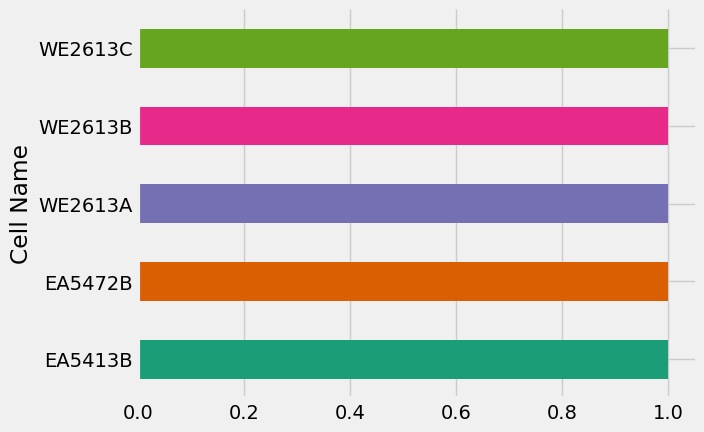

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Cell Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

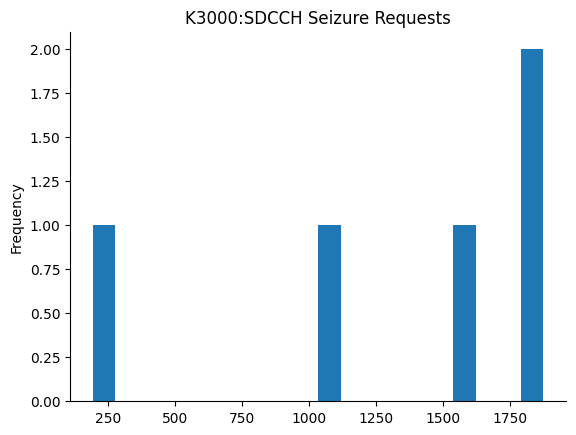

In [ ]:
from matplotlib import pyplot as plt
_df_0['K3000:SDCCH Seizure Requests'].plot(kind='hist', bins=20, title='K3000:SDCCH Seizure Requests')
plt.gca().spines[['top', 'right',]].set_visible(False)

# data preprocessing

In [16]:
sdch_df.info()
sdch_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77622 entries, 0 to 77621
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          77622 non-null  object
 1   K3000:SDCCH Seizure Requests  77622 non-null  int64 
 2   Cell Name                     77622 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


,Date,K3000:SDCCH Seizure Requests,Cell Name
0,2023-06-27,1862,WE2613C
1,2023-06-27,1876,WE2613B
2,2023-06-27,1580,WE2613A
3,2023-06-27,193,EA5472B
4,2023-06-27,1068,EA5413B
...,...,...,...
77617,2023-07-11,2358,WE2458A
77618,2023-07-11,6175,WE2058A
77619,2023-07-11,3079,WE2059C
77620,2023-07-11,1822,WE2317A


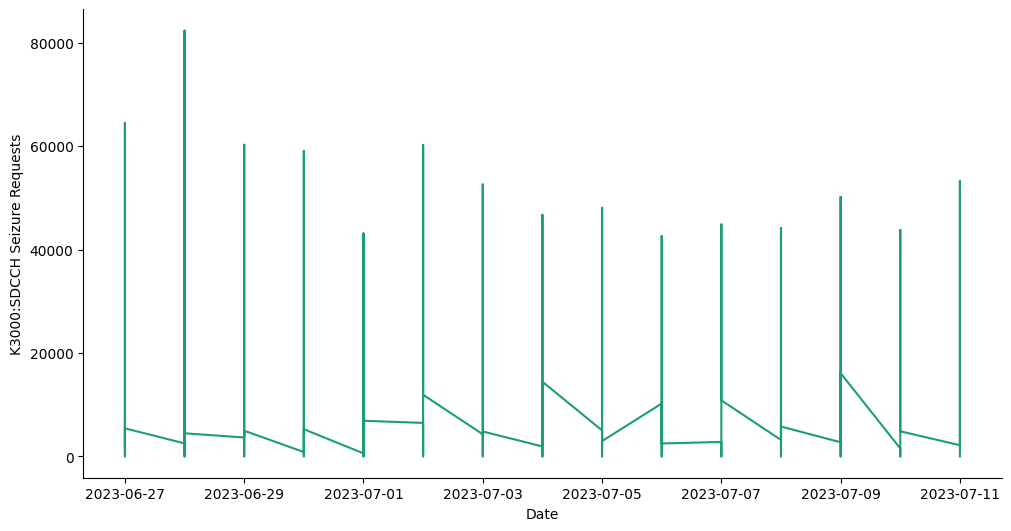

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['K3000:SDCCH Seizure Requests']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sdch_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('K3000:SDCCH Seizure Requests')

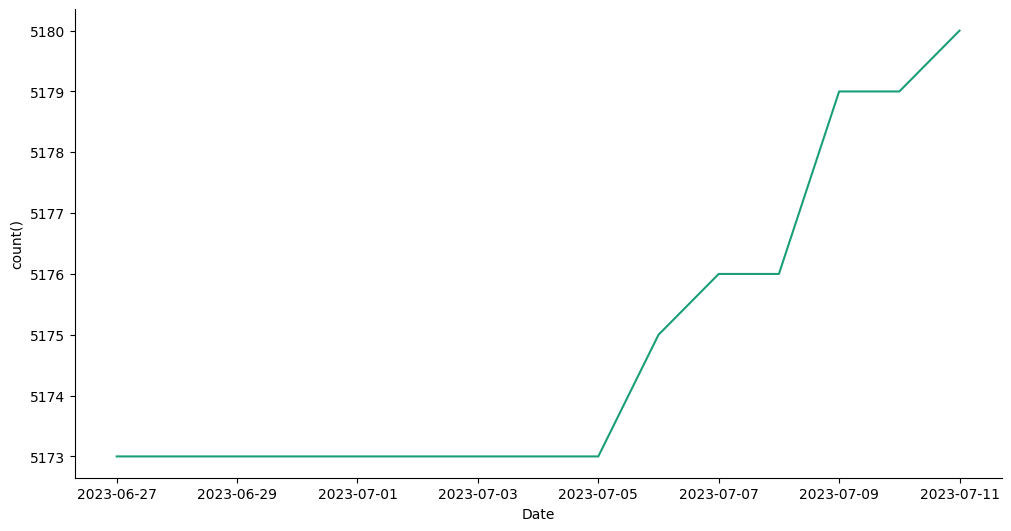

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sdch_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

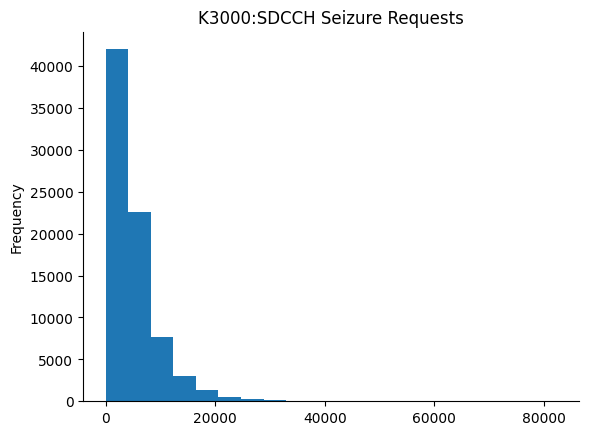

In [19]:
from matplotlib import pyplot as plt
sdch_df['K3000:SDCCH Seizure Requests'].plot(kind='hist', bins=20, title='K3000:SDCCH Seizure Requests')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:

print(sdch_df['K3000:SDCCH Seizure Requests'].isna().sum())
print(sdch_df['K3000:SDCCH Seizure Requests'].isnull().sum())

0
0


In [21]:
import pandas as pd

# Assuming 'df' is your DataFrame with a column named 'timestamp'
# Convert the 'timestamp' column to a pandas datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Resample the data to different frequencies (hourly, daily, monthly)
hourly_freq = df['Date'].dt.hour.value_counts()
daily_freq = df['Date'].dt.day.value_counts()
monthly_freq = df['Date'].dt.month.value_counts()

print("Hourly frequency:")
print(hourly_freq)

print("\nDaily frequency:")
print(daily_freq)

print("\nMonthly frequency:")
print(monthly_freq)


Hourly frequency:
0    77622
Name: Date, dtype: int64

Daily frequency:
11    5180
9     5179
10    5179
7     5176
8     5176
6     5175
27    5173
28    5173
29    5173
30    5173
1     5173
2     5173
3     5173
4     5173
5     5173
Name: Date, dtype: int64

Monthly frequency:
7    56930
6    20692
Name: Date, dtype: int64


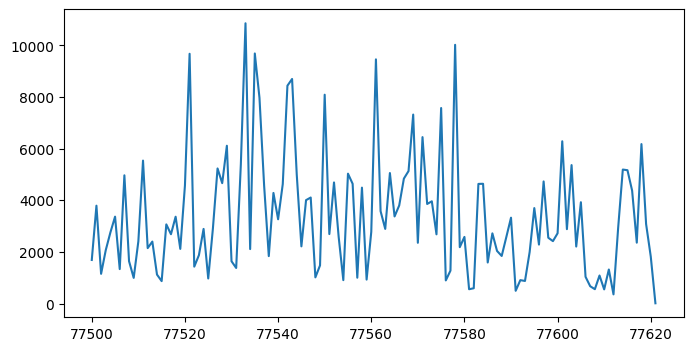

In [22]:

plt.figure(figsize=(8,4))
plt.plot(sdch_df['K3000:SDCCH Seizure Requests'].iloc[77500:,])

In [23]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Grouping by 'Cell Name' and aggregating by mean for each group
grouped = sdch_df.groupby('Cell Name').count()

# Display the aggregated DataFrame
print(grouped)


            Date  K3000:SDCCH Seizure Requests
Cell Name                                     
EA5000A       15                            15
EA5000B       15                            15
EA5000C       15                            15
EA5002A       15                            15
EA5002B       15                            15
...          ...                           ...
ZZ-KA3928A    15                            15
ZZ-KA3930A    14                            14
ZZ-SO3086A    15                            15
ZZ-SO3086B    15                            15
ZZ-SO3086C    15                            15

[5182 rows x 2 columns]


In [ ]:
import pandas as pd

sdch_random_sample = sdch_df.sample(n=3000, random_state=42)

# Display the randomly selected sample
sdch_random_sample.head()


,Date,K3000:SDCCH Seizure Requests,Cell Name
69204,2023-07-10,4559,KA1882C
29862,2023-07-02,11637,WE2092C
29389,2023-07-02,2499,EA5046B
58834,2023-07-08,3795,KA1650C
54322,2023-07-07,3413,KA1806B


for each cell we have 15 day data

In [ ]:
sdch_data= sdch_random_sample.set_index("Date")
sdch_data.head()
sdch_data=sdch_data.drop('Cell Name',axis=1)
# scaling the data to reduce them to same range between 0 and 1
normalization = MinMaxScaler(feature_range=(0,1))
sdch_scaled =normalization.fit_transform(np.array(sdch_data).reshape(-1,1))
print(sdch_data.shape,sdch_scaled.shape)

(3000, 1) (3000, 1)


In [ ]:
# now defining data for test and train for model building considering 70% for train and 30% for test
train_size= int(len(sdch_scaled)*.70)
test_size = len(sdch_scaled)-train_size

print(train_size,test_size)

2100 900


In [ ]:
# assigning train  and test value from scaled data
sdch_train,sdch_test = sdch_scaled[0:train_size,0:1],sdch_scaled[train_size:,0:1]
print(len(sdch_train),len(sdch_test))

2100 900


In [ ]:
def create_data (data_set,time_stamp):
  Xtrain = [] # empty x_train
  Ytrain = [] # empty y_train
  for i in range(time_stamp, len(data_set)):
    Xtrain.append(data_set[i-time_stamp:i, 0])
    Ytrain.append(data_set[i, 0])
  return np.array(Xtrain),np.array(Ytrain)
time_step =60
x_train, y_train = create_data(sdch_train,time_step)


In [ ]:
print(f"x train data set dim :{x_train.shape}, y train data set dim :{y_train.shape}")


x train data set dim :(2040, 60), y train data set dim :(2040,)


In [ ]:
def create_data (data_set,time_stamp):
  Xtest = [] # empty x_train
  Ytest = [] # empty y_train
  for i in range(time_stamp, len(data_set)):
    Xtest.append(data_set[i-time_stamp:i, 0])
    Ytest.append(data_set[i, 0])
  return np.array(Xtest),np.array(Ytest)
time_step =60
x_test, y_test = create_data(sdch_test,time_step)

In [ ]:
print(f"x test data set dim :{x_test.shape}, y test data set dim :{y_test.shape}")

x test data set dim :(840, 60), y test data set dim :(840,)


In [ ]:
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(840, 60, 1)
(840,)
(2040, 60, 1)
(2040,)


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
# model building
model = Sequential()
model.add(LSTM(units=70,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=70,return_sequences=True))
model.add(LSTM(units=70))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 60, 70)            20160     
                                                                 
 lstm_22 (LSTM)              (None, 60, 70)            39480     
                                                                 
 lstm_23 (LSTM)              (None, 70)                39480     
                                                                 
 dense_7 (Dense)             (None, 1)                 71        
                                                                 
Total params: 99191 (387.46 KB)
Trainable params: 99191 (387.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#initilazing model with optimmizer adam taking mean square loss and metric is mean absolute error
model.compile(optimizer = 'adam', loss = 'mse' , metrics="mean_absolute_error")
# Fitting the LSTM to the Training set
from keras.callbacks import EarlyStopping
# setting call back to control model complexity and avoid overfitting of model
callbacks = [EarlyStopping(monitor='loss', patience=10 , restore_best_weights=True)]
# fitting model
history = model.fit(x_train, y_train, epochs = 30, batch_size = 200, callbacks = callbacks )

Epoch 1/30
11/11 [==============================] - 13s 498ms/step - loss: 0.0149 - mean_absolute_error: 0.0865
Epoch 2/30
11/11 [==============================] - 4s 361ms/step - loss: 0.0121 - mean_absolute_error: 0.0751
Epoch 3/30
11/11 [==============================] - 4s 363ms/step - loss: 0.0118 - mean_absolute_error: 0.0728
Epoch 4/30
11/11 [==============================] - 7s 635ms/step - loss: 0.0117 - mean_absolute_error: 0.0776
Epoch 5/30
11/11 [==============================] - 4s 371ms/step - loss: 0.0117 - mean_absolute_error: 0.0727
Epoch 6/30
11/11 [==============================] - 4s 358ms/step - loss: 0.0116 - mean_absolute_error: 0.0757
Epoch 7/30
11/11 [==============================] - 5s 450ms/step - loss: 0.0116 - mean_absolute_error: 0.0737
Epoch 8/30
11/11 [==============================] - 6s 575ms/step - loss: 0.0116 - mean_absolute_error: 0.0756
Epoch 9/30
11/11 [==============================] - 4s 359ms/step - loss: 0.0117 - mean_absolute_error: 0.0735


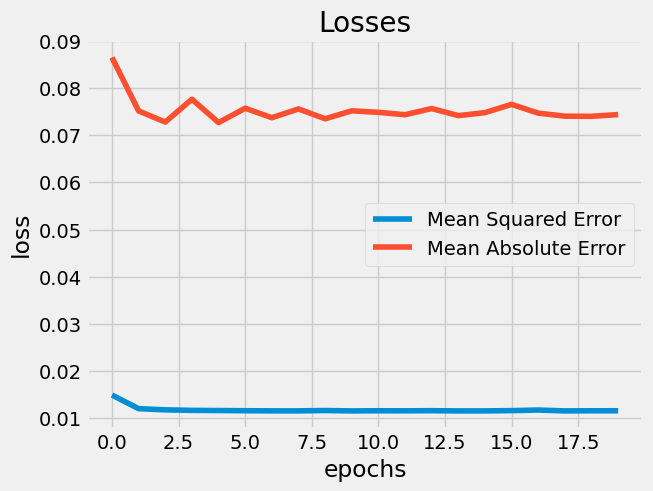

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling to return predicted value back to its original form
predictions = normalization.inverse_transform(predictions)
print(predictions.shape)
print(f'predicted values: {predictions} ')

27/27 [==============================] - 5s 41ms/step
(840, 1)
predicted values: [[4706.8545]
 [4713.3003]
 [4703.1797]
 [4676.4746]
 [4637.1953]
 [4592.138 ]
 [4560.9326]
 [4532.6377]
 [4506.7227]
 [4487.4253]
 [4492.672 ]
 [4501.0005]
 [4504.355 ]
 [4505.082 ]
 [4500.7573]
 [4506.6587]
 [4510.591 ]
 [4526.455 ]
 [4546.3486]
 [4564.1357]
 [4599.4272]
 [4638.516 ]
 [4667.049 ]
 [4694.8306]
 [4711.697 ]
 [4723.5615]
 [4724.078 ]
 [4712.163 ]
 [4697.5244]
 [4701.436 ]
 [4713.7524]
 [4729.667 ]
 [4738.396 ]
 [4762.212 ]
 [4787.288 ]
 [4817.2607]
 [4833.507 ]
 [4848.889 ]
 [4860.062 ]
 [4858.7964]
 [4851.8105]
 [4833.9634]
 [4805.286 ]
 [4764.977 ]
 [4720.725 ]
 [4679.6797]
 [4637.408 ]
 [4592.2114]
 [4550.1562]
 [4527.5176]
 [4520.3647]
 [4522.735 ]
 [4526.7456]
 [4524.448 ]
 [4530.835 ]
 [4540.605 ]
 [4553.476 ]
 [4564.375 ]
 [4568.0186]
 [4575.8276]
 [4578.268 ]
 [4569.5596]
 [4557.2236]
 [4541.5054]
 [4540.333 ]
 [4548.654 ]
 [4555.7305]
 [4576.9526]
 [4604.634 ]
 [4635.8135]
 [4662.88

In [ ]:
#inverse y_test scaling returning y test to its original value
y_test = normalization.inverse_transform([y_test])
# calculating root mean sq error
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

19.18

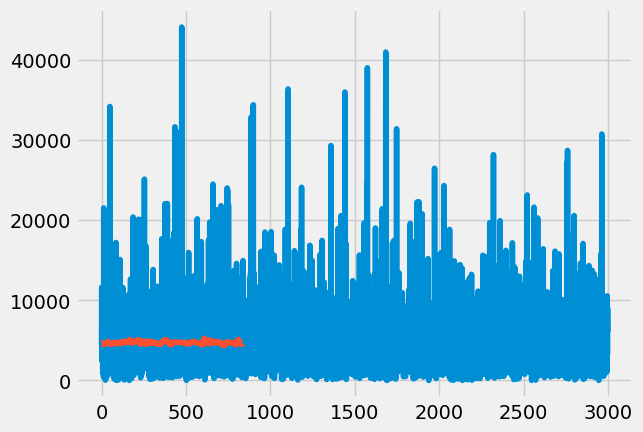

In [ ]:
plt.plot(normalization.inverse_transform(sdch_scaled))
plt.plot(predictions)

In [ ]:

len(sdch_test)

900

In [ ]:
# considering 60 data
fut_inp = sdch_test[840:]
len(fut_inp)
fut_inp=fut_inp.reshape(1,-1)
temp_inp=list(fut_inp)
fut_inp.shape

(1, 60)

In [ ]:
temp_inp = temp_inp[0].tolist()

In [ ]:
lst_output =[]
n_steps = 60
i =0
while i<30:
  if(len(temp_inp)>60):
    fut_inp =np.array(temp_inp[1:])
    fut_inp =fut_inp.reshape(1,-1)
    fut_inp =fut_inp.reshape((1,n_steps,1))
    yhat = model.predict(fut_inp,verbose=0)
    temp_inp.extend(yhat[0].tolist())
    temp_inp = temp_inp[1:]
    lst_output.extend(yhat.tolist())
    i+=1
  else:
    fut_inp = fut_inp.reshape((1,n_steps,1))
    yhat = model.predict(fut_inp)
    temp_inp.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i+=1

1/1 [==============================] - 0s 54ms/step


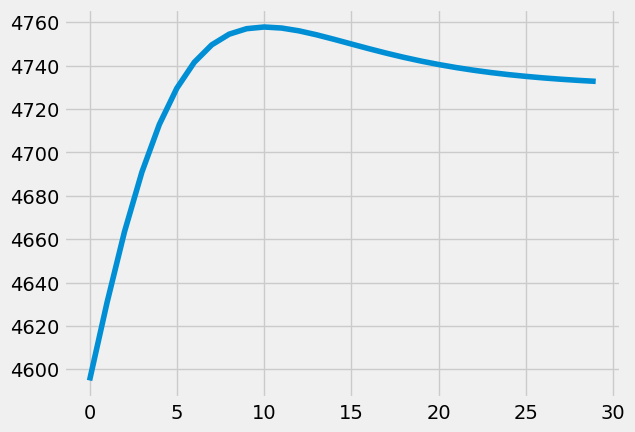

In [ ]:
plt.plot(normalization.inverse_transform(lst_output))

In [ ]:
sdch_scaled.shape

(3000, 1)

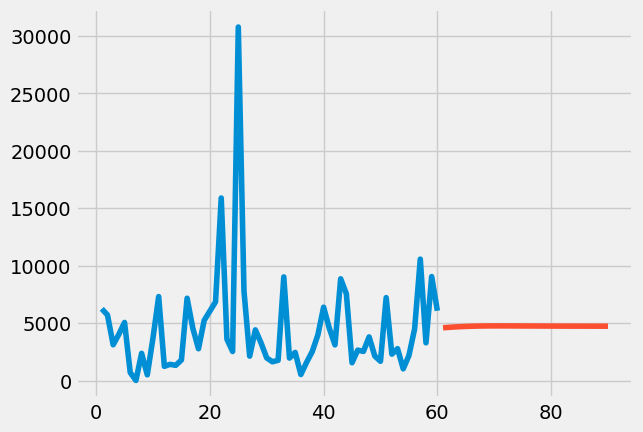

In [ ]:
plot_new =np.arange(1,61)
plot_pred=np.arange(61,91)
plt.plot(plot_new,normalization.inverse_transform(sdch_scaled[2940:]))
plt.plot(plot_pred,normalization.inverse_transform(lst_output))


In [ ]:
sdch_new = sdch_scaled.tolist()
len(sdch_new)
sdch_new.extend(lst_output)

Text(0, 0.5, 'kpi')

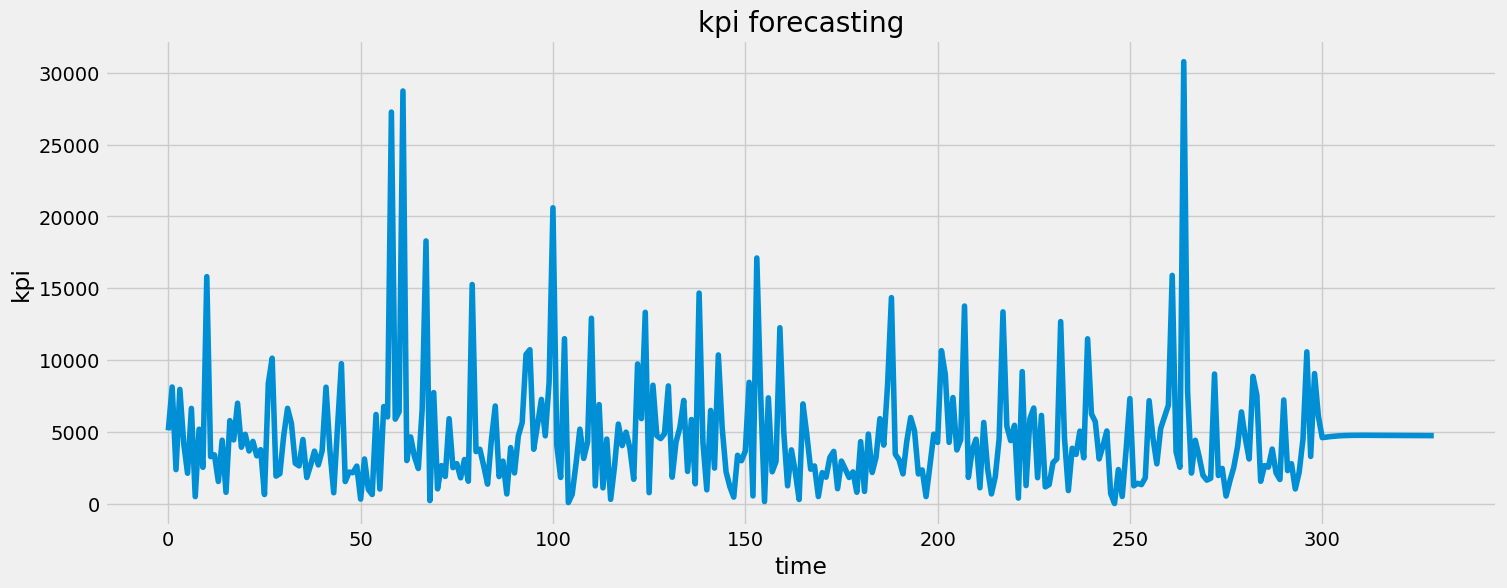

In [ ]:
final_graph = normalization.inverse_transform(sdch_new).tolist()
plt.figure(figsize=(16,6))
plt.plot(final_graph[2700:])
plt.title('kpi forecasting')
plt.xlabel('time')
plt.ylabel('kpi')

In [ ]:
#30 day forecasting

train_size_1= int(len(sdch_scaled)*.70)
test_size_1= len(sdch_scaled)-train_size_1

print(train_size_1,test_size_1)

2100 900


In [ ]:
# assigning train  and test value from scaled data
sdch_train_1,sdch_test_1 = sdch_scaled[0:train_size_1,0:1],sdch_scaled[train_size_1:,0:1]
print(len(sdch_train_1),len(sdch_test_1))

2100 900


In [ ]:
def create_data (data_set,time_stamp):
  Xtrain_1 = [] # empty x_train
  Ytrain_1 = [] # empty y_train
  for i in range(time_stamp, len(data_set)):
    Xtrain_1.append(data_set[i-time_stamp:i, 0])
    Ytrain_1.append(data_set[i, 0])
  return np.array(Xtrain_1),np.array(Ytrain_1)
time_step =30
x_train_1, y_train_1 = create_data(sdch_train_1,time_step)

In [ ]:
print(f"x train data set dim :{x_train_1.shape}, y train data set dim :{y_train_1.shape}")

x train data set dim :(2070, 30), y train data set dim :(2070,)


In [ ]:
def create_data (data_set,time_stamp):
  Xtest_1 = [] # empty x_train
  Ytest_1 = [] # empty y_train
  for i in range(time_stamp, len(data_set)):
    Xtest_1.append(data_set[i-time_stamp:i, 0])
    Ytest_1.append(data_set[i, 0])
  return np.array(Xtest_1),np.array(Ytest_1)
time_step =30
x_test_1, y_test_1 = create_data(sdch_test_1,time_step)

In [ ]:
print(f"x test data set dim :{x_test_1.shape}, y test data set dim :{y_test_1.shape}")

x test data set dim :(870, 30), y test data set dim :(870,)


In [ ]:
# Reshaping the input
x_train_1 = np.reshape(x_train_1, (x_train_1.shape[0], x_train_1.shape[1], 1))
x_test_1 = np.reshape(x_test_1,(x_test_1.shape[0],x_test_1.shape[1],1))
print(x_test_1.shape)
print(y_test_1.shape)
print(x_train_1.shape)
print(y_train_1.shape)

(870, 30, 1)
(870,)
(2070, 30, 1)
(2070,)


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
# model building
model = Sequential()
model.add(LSTM(units=30,return_sequences=True,input_shape=(x_train_1.shape[1],1)))
model.add(LSTM(units=30,return_sequences=True))
model.add(LSTM(units=10))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 30, 30)            3840      
                                                                 
 lstm_43 (LSTM)              (None, 30, 30)            7320      
                                                                 
 lstm_44 (LSTM)              (None, 10)                1640      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12811 (50.04 KB)
Trainable params: 12811 (50.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#initilazing model with optimmizer adam taking mean square loss and metric is mean absolute error
model.compile(optimizer = 'adam', loss = 'mse' , metrics="mean_absolute_error")
# Fitting the LSTM to the Training set
from keras.callbacks import EarlyStopping
# setting call back to control model complexity and avoid overfitting of model
callbacks = [EarlyStopping(monitor='loss', patience=10 , restore_best_weights=True)]
# fitting model
history = model.fit(x_train_1, y_train_1, epochs = 30, batch_size = 100, callbacks = callbacks )

Epoch 1/30
21/21 [==============================] - 7s 46ms/step - loss: 0.0142 - mean_absolute_error: 0.0841
Epoch 2/30
21/21 [==============================] - 1s 48ms/step - loss: 0.0118 - mean_absolute_error: 0.0745
Epoch 3/30
21/21 [==============================] - 1s 54ms/step - loss: 0.0118 - mean_absolute_error: 0.0750
Epoch 4/30
21/21 [==============================] - 2s 79ms/step - loss: 0.0118 - mean_absolute_error: 0.0749
Epoch 5/30
21/21 [==============================] - 2s 79ms/step - loss: 0.0118 - mean_absolute_error: 0.0755
Epoch 6/30
21/21 [==============================] - 2s 80ms/step - loss: 0.0118 - mean_absolute_error: 0.0747
Epoch 7/30
21/21 [==============================] - 2s 81ms/step - loss: 0.0118 - mean_absolute_error: 0.0753
Epoch 8/30
21/21 [==============================] - 1s 64ms/step - loss: 0.0118 - mean_absolute_error: 0.0748
Epoch 9/30
21/21 [==============================] - 1s 49ms/step - loss: 0.0119 - mean_absolute_error: 0.0760
Epoch 10/3

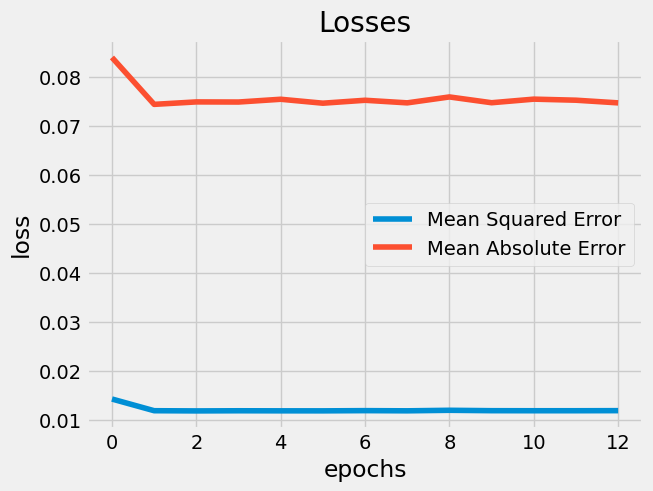

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
#inverse y_test scaling
predictions = model.predict(x_test_1)

#inverse predictions scaling to return predicted value back to its original form
predictions = normalization.inverse_transform(predictions)
print(predictions.shape)
print(f'predicted values: {predictions} ')

28/28 [==============================] - 1s 10ms/step
(870, 1)
predicted values: [[5151.0156]
 [5096.003 ]
 [5026.488 ]
 [4948.0957]
 [4867.1177]
 [4786.6934]
 [4708.8516]
 [4636.222 ]
 [4613.288 ]
 [4610.1846]
 [4601.585 ]
 [4605.2334]
 [4609.1694]
 [4607.977 ]
 [4598.024 ]
 [4578.02  ]
 [4545.6416]
 [4515.675 ]
 [4487.266 ]
 [4455.71  ]
 [4432.569 ]
 [4416.7285]
 [4407.199 ]
 [4419.1196]
 [4473.521 ]
 [4541.4194]
 [4636.321 ]
 [4733.8735]
 [4812.6562]
 [4869.778 ]
 [4896.4937]
 [4897.7905]
 [4873.498 ]
 [4824.767 ]
 [4758.568 ]
 [4686.36  ]
 [4639.2197]
 [4599.174 ]
 [4561.291 ]
 [4537.955 ]
 [4554.0317]
 [4572.3916]
 [4582.0205]
 [4585.9346]
 [4580.395 ]
 [4590.6113]
 [4597.223 ]
 [4621.8604]
 [4652.6963]
 [4679.4478]
 [4733.0576]
 [4792.3335]
 [4833.35  ]
 [4871.333 ]
 [4890.5938]
 [4904.385 ]
 [4898.583 ]
 [4876.0327]
 [4850.6343]
 [4856.454 ]
 [4877.3896]
 [4903.8584]
 [4918.4814]
 [4956.989 ]
 [4996.6943]
 [5042.998 ]
 [5064.8096]
 [5086.6636]
 [5101.0854]
 [5095.2207]
 [5079.21

In [ ]:
#inverse y_test scaling returning y test to its original value
y_test = normalization.inverse_transform([y_test_1])
# calculating root mean sq error
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

189.32

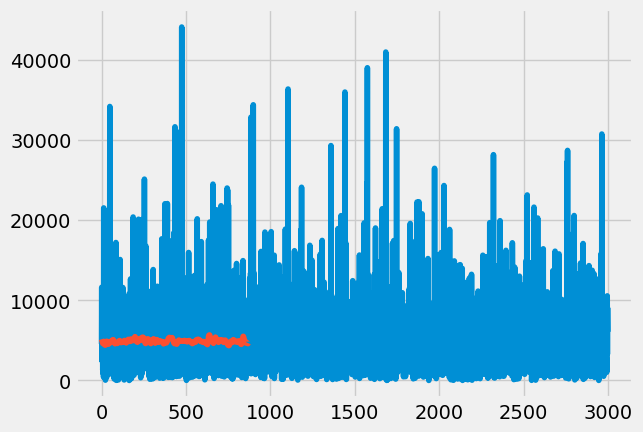

In [ ]:
plt.plot(normalization.inverse_transform(sdch_scaled))
plt.plot(predictions)

In [ ]:
len(sdch_test_1)

900

In [ ]:
# considering 60 data
fut_inp = sdch_test[870:]
len(fut_inp)
fut_inp=fut_inp.reshape(1,-1)
temp_inp=list(fut_inp)
fut_inp.shape

(1, 30)

In [ ]:
temp_inp = temp_inp[0].tolist()

In [ ]:
lst_output =[]
n_steps = 30
i =0
while i<30:
  if(len(temp_inp)>30):
    fut_inp =np.array(temp_inp[1:])
    fut_inp =fut_inp.reshape(1,-1)
    fut_inp =fut_inp.reshape((1,n_steps,1))
    yhat = model.predict(fut_inp,verbose=0)
    temp_inp.extend(yhat[0].tolist())
    temp_inp = temp_inp[1:]
    lst_output.extend(yhat.tolist())
    i+=1
  else:
    fut_inp = fut_inp.reshape((1,n_steps,1))
    yhat = model.predict(fut_inp)
    temp_inp.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i+=1

1/1 [==============================] - 0s 58ms/step


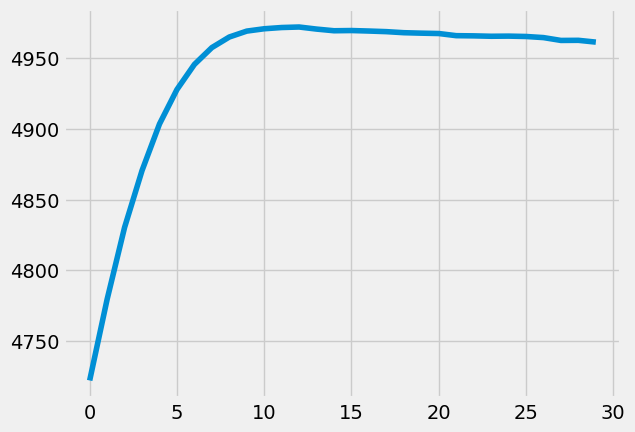

In [ ]:
plt.plot(normalization.inverse_transform(lst_output))

In [ ]:
sdch_scaled.shape

(3000, 1)

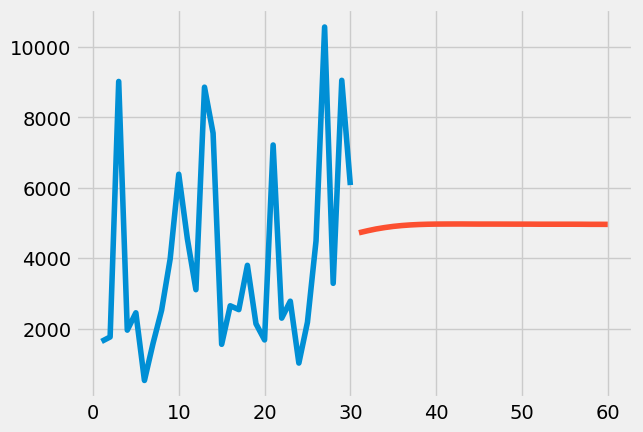

In [ ]:
plot_new =np.arange(1,31)
plot_pred=np.arange(31,61)
plt.plot(plot_new,normalization.inverse_transform(sdch_scaled[2970:]))
plt.plot(plot_pred,normalization.inverse_transform(lst_output))


In [ ]:
sdch_new = sdch_scaled.tolist()
len(sdch_new)
sdch_new.extend(lst_output)

Text(0, 0.5, 'kpi')

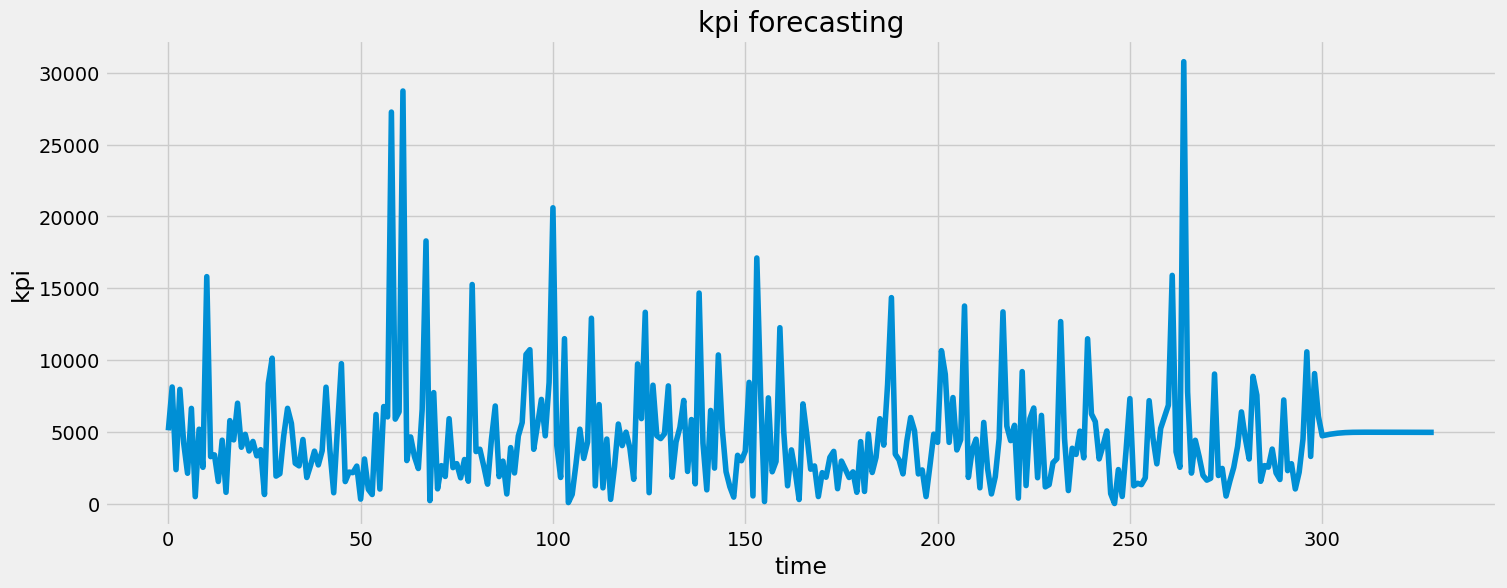

In [ ]:
final_graph = normalization.inverse_transform(sdch_new).tolist()
plt.figure(figsize=(16,6))
plt.plot(final_graph[2700:])
plt.title('kpi forecasting')
plt.xlabel('time')
plt.ylabel('kpi')

In [87]:
import pandas as pd

sdch_random_sample = sdch_df.iloc[0:2000,]

# Display the randomly selected sample
sdch_random_sample.head()

,Date,K3000:SDCCH Seizure Requests,Cell Name
0,2023-06-27,1862,WE2613C
1,2023-06-27,1876,WE2613B
2,2023-06-27,1580,WE2613A
3,2023-06-27,193,EA5472B
4,2023-06-27,1068,EA5413B


Text(0, 0.5, 'kpi')

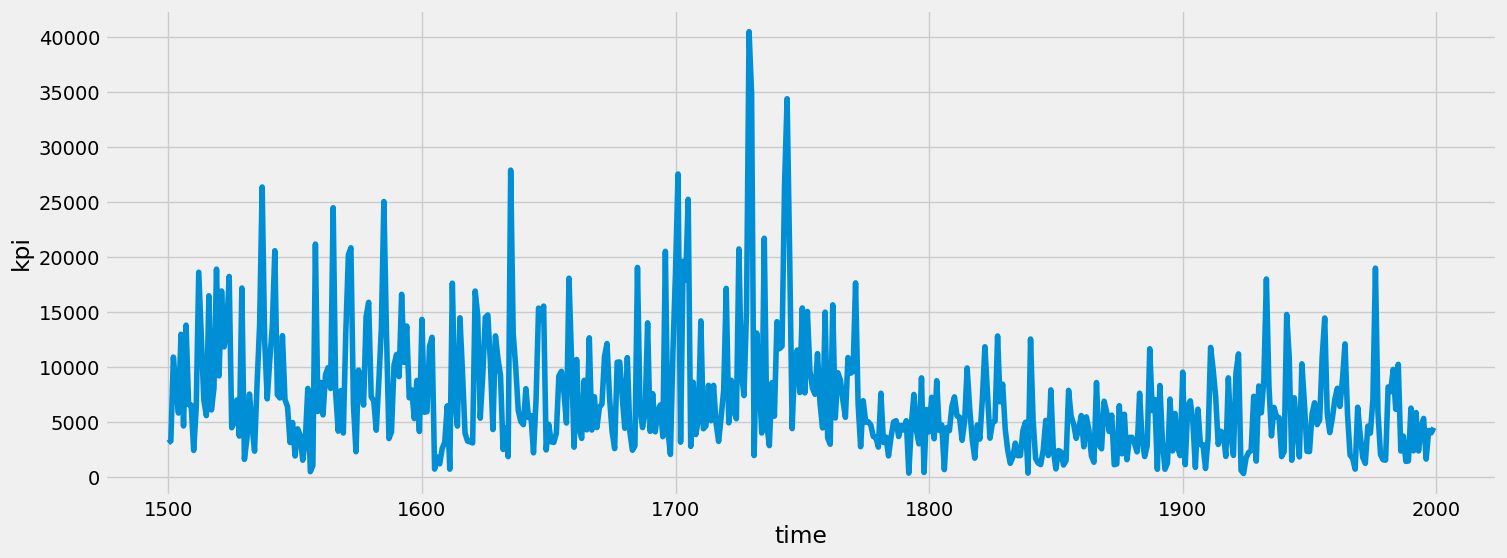

In [104]:
plt.figure(figsize=(16,6))
plt.plot(sdch_random_sample['K3000:SDCCH Seizure Requests'].iloc[1500:])
plt.xlabel('time')
plt.ylabel('kpi')

# as we can see the data is stationary


In [89]:
sdch_data= sdch_random_sample.set_index("Date")
sdch_data.head()
sdch_data=sdch_data.drop('Cell Name',axis=1)
# scaling the data to reduce them to same range between 0 and 1
normalization = MinMaxScaler(feature_range=(0,1))
sdch_scaled =normalization.fit_transform(np.array(sdch_data).reshape(-1,1))
print(sdch_data.shape,sdch_scaled.shape)

(2000, 1) (2000, 1)


In [90]:
# now defining data for test and train for model building considering 70% for train and 30% for test
train_size= int(len(sdch_scaled)*.70)
test_size = len(sdch_scaled)-train_size

print(train_size,test_size)

1400 600


In [91]:
# assigning train  and test value from scaled data
sdch_train,sdch_test = sdch_scaled[0:train_size,0:1],sdch_scaled[train_size:,0:1]
print(len(sdch_train),len(sdch_test))

1400 600


In [92]:
def create_data (data_set,time_stamp):
  Xtrain = [] # empty x_train
  Ytrain = [] # empty y_train
  for i in range(time_stamp, len(data_set)):
    Xtrain.append(data_set[i-time_stamp:i, 0])
    Ytrain.append(data_set[i, 0])
  return np.array(Xtrain),np.array(Ytrain)
time_step =30
x_train, y_train = create_data(sdch_train,time_step)


In [93]:
print(f"x train data set dim :{x_train.shape}, y train data set dim :{y_train.shape}")

x train data set dim :(1370, 30), y train data set dim :(1370,)


In [94]:
def create_data (data_set,time_stamp):
  Xtest = [] # empty x_train
  Ytest = [] # empty y_train
  for i in range(time_stamp, len(data_set)):
    Xtest.append(data_set[i-time_stamp:i, 0])
    Ytest.append(data_set[i, 0])
  return np.array(Xtest),np.array(Ytest)
time_step =30
x_test, y_test = create_data(sdch_test,time_step)

In [95]:
print(f"x test data set dim :{x_test.shape}, y test data set dim :{y_test.shape}")

x test data set dim :(570, 30), y test data set dim :(570,)


In [96]:
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(570, 30, 1)
(570,)
(1370, 30, 1)
(1370,)


In [99]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
# model building
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100,return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 30, 100)           40800     
                                                                 
 lstm_28 (LSTM)              (None, 30, 100)           80400     
                                                                 
 lstm_29 (LSTM)              (None, 100)               80400     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201701 (787.89 KB)
Trainable params: 201701 (787.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
#initilazing model with optimmizer adam taking mean square loss and metric is mean absolute error
model.compile(optimizer = 'adam', loss = 'mse' , metrics="mean_absolute_error")
# Fitting the LSTM to the Training set
from keras.callbacks import EarlyStopping
# setting call back to control model complexity and avoid overfitting of model
callbacks = [EarlyStopping(monitor='loss', patience=10 , restore_best_weights=True)]
# fitting model
history = model.fit(x_train, y_train, epochs = 30, batch_size = 200, callbacks = callbacks )

Epoch 1/30
7/7 [==============================] - 9s 399ms/step - loss: 0.0067 - mean_absolute_error: 0.0587
Epoch 2/30
7/7 [==============================] - 3s 397ms/step - loss: 0.0054 - mean_absolute_error: 0.0469
Epoch 3/30
7/7 [==============================] - 2s 246ms/step - loss: 0.0053 - mean_absolute_error: 0.0532
Epoch 4/30
7/7 [==============================] - 2s 234ms/step - loss: 0.0052 - mean_absolute_error: 0.0466
Epoch 5/30
7/7 [==============================] - 2s 235ms/step - loss: 0.0051 - mean_absolute_error: 0.0516
Epoch 6/30
7/7 [==============================] - 2s 227ms/step - loss: 0.0051 - mean_absolute_error: 0.0466
Epoch 7/30
7/7 [==============================] - 2s 234ms/step - loss: 0.0050 - mean_absolute_error: 0.0485
Epoch 8/30
7/7 [==============================] - 2s 234ms/step - loss: 0.0049 - mean_absolute_error: 0.0469
Epoch 9/30
7/7 [==============================] - 3s 385ms/step - loss: 0.0050 - mean_absolute_error: 0.0480
Epoch 10/30
7/7 [==

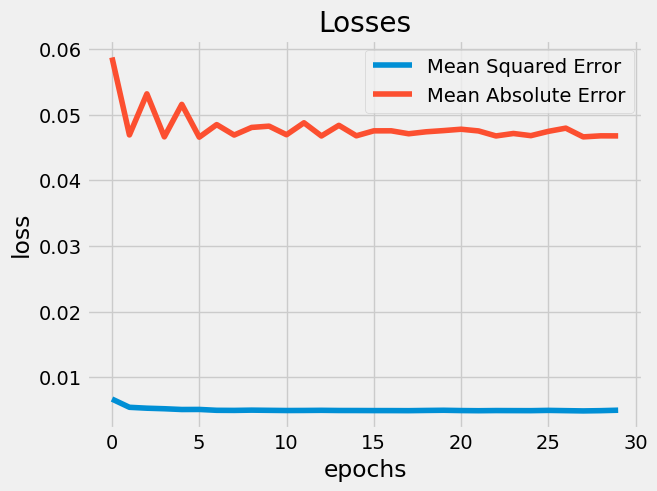

In [101]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [102]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling to return predicted value back to its original form
predictions = normalization.inverse_transform(predictions)
print(predictions.shape)
print(f'predicted values: {predictions} ')

18/18 [==============================] - 3s 26ms/step
(570, 1)
predicted values: [[ 7026.439 ]
 [ 8078.1406]
 [ 9393.    ]
 [10029.526 ]
 [10095.307 ]
 [ 9683.159 ]
 [ 9073.021 ]
 [ 8323.661 ]
 [ 7789.698 ]
 [ 7329.635 ]
 [ 6931.916 ]
 [ 6667.7217]
 [ 6525.8228]
 [ 6408.453 ]
 [ 6324.291 ]
 [ 6311.193 ]
 [ 6538.677 ]
 [ 6886.912 ]
 [ 7250.6353]
 [ 7420.264 ]
 [ 7413.9614]
 [ 7351.3975]
 [ 7299.686 ]
 [ 7120.738 ]
 [ 6760.148 ]
 [ 6444.643 ]
 [ 6198.255 ]
 [ 5997.4785]
 [ 5931.7563]
 [ 5781.433 ]
 [ 5818.8247]
 [ 5378.273 ]
 [ 5243.0977]
 [ 5446.1567]
 [ 5791.819 ]
 [ 6183.687 ]
 [ 6419.0513]
 [ 6560.7305]
 [ 6569.648 ]
 [ 6484.8403]
 [ 6298.3105]
 [ 6102.758 ]
 [ 5900.3975]
 [ 5811.6533]
 [ 5923.7314]
 [ 6030.94  ]
 [ 5992.017 ]
 [ 5890.1567]
 [ 5809.615 ]
 [ 5827.737 ]
 [ 5907.646 ]
 [ 5940.8228]
 [ 5869.0117]
 [ 6164.8994]
 [ 6458.583 ]
 [ 6871.6406]
 [ 7117.3013]
 [ 7219.979 ]
 [ 7188.4775]
 [ 7131.0903]
 [ 7268.4907]
 [ 7299.6855]
 [ 7236.6523]
 [ 6993.152 ]
 [ 6834.3467]
 [ 6832.0

In [ ]:
y_test.shape


In [103]:
#inverse y_test scaling returning y test to its original value
y_test = normalization.inverse_transform([y_test])
# calculating root mean sq error
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

306.31

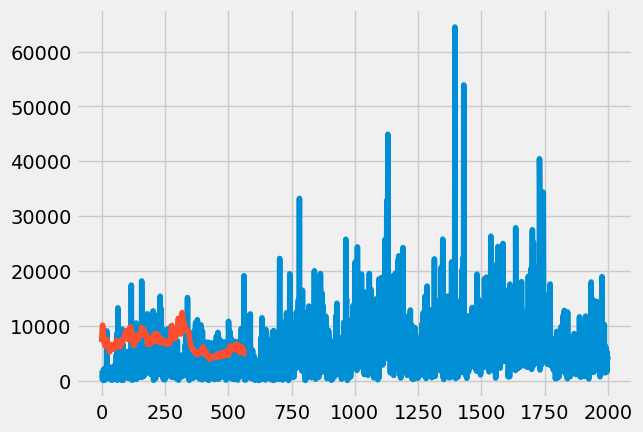

In [105]:
plt.plot(normalization.inverse_transform(sdch_scaled))
plt.plot(predictions)

In [107]:
len(sdch_test)

600

In [108]:
# considering 60 data
fut_inp = sdch_test[570:]
len(fut_inp)
fut_inp=fut_inp.reshape(1,-1)
temp_inp=list(fut_inp)
fut_inp.shape

(1, 30)

In [109]:
temp_inp = temp_inp[0].tolist()

In [110]:
lst_output =[]
n_steps = 30
i =0
while i<30:
  if(len(temp_inp)>30):
    fut_inp =np.array(temp_inp[1:])
    fut_inp =fut_inp.reshape(1,-1)
    fut_inp =fut_inp.reshape((1,n_steps,1))
    yhat = model.predict(fut_inp,verbose=0)
    temp_inp.extend(yhat[0].tolist())
    temp_inp = temp_inp[1:]
    lst_output.extend(yhat.tolist())
    i+=1
  else:
    fut_inp = fut_inp.reshape((1,n_steps,1))
    yhat = model.predict(fut_inp)
    temp_inp.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i+=1

1/1 [==============================] - 0s 35ms/step


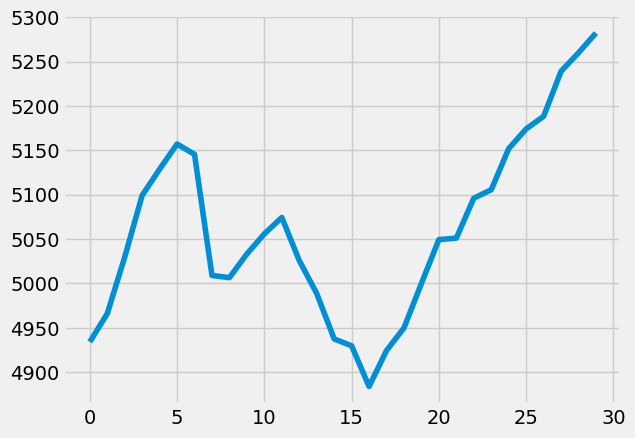

In [111]:
plt.plot(normalization.inverse_transform(lst_output))

In [112]:
sdch_scaled.shape

(2000, 1)

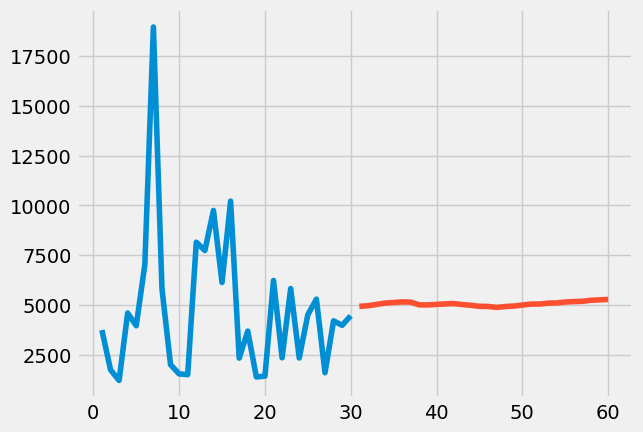

In [113]:
plot_new =np.arange(1,31)
plot_pred=np.arange(31,61)
plt.plot(plot_new,normalization.inverse_transform(sdch_scaled[1970:]))
plt.plot(plot_pred,normalization.inverse_transform(lst_output))

In [121]:
sdch_new = sdch_scaled.tolist()
len(sdch_new)
sdch_new.extend(lst_output)

Text(0, 0.5, 'kpi')

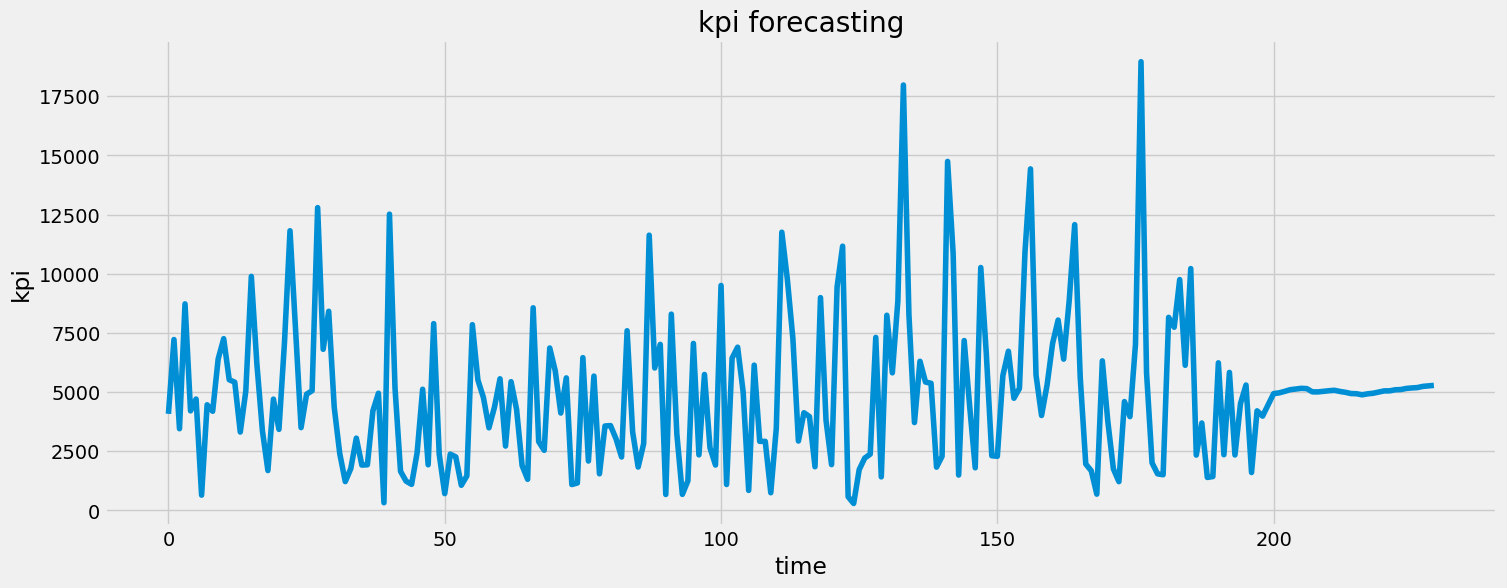

In [122]:
final_graph = normalization.inverse_transform(sdch_new).tolist()
plt.figure(figsize=(16,6))
plt.plot(final_graph[1800:])
plt.title('kpi forecasting')
plt.xlabel('time')
plt.ylabel('kpi')